# visualizing data

In [56]:
import pandas as pd

metro_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro_data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [27]:
metro_data.info()
metro_data['traffic_volume'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

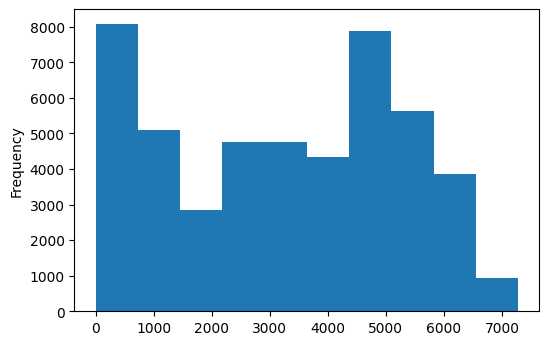

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
metro_data['traffic_volume'].plot.hist()
plt.show()

In [32]:
metro_data['date_time'] = pd.to_datetime(metro_data['date_time'])

daytime = metro_data[(metro_data['date_time'].dt.hour > 7) & (metro_data['date_time'].dt.hour < 19)]
print(daytime)
nighttime = metro_data[(metro_data['date_time'].dt.hour >= 19 ) | (metro_data['date_time'].dt.hour <= 7)]
print(nighttime)

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0          90       Clouds   
3        None  290.13     0.00      0.0          90       Clouds   
4        None  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizzle   
48196    None  284.38     0.00      0.0          75         Rain   
48197    None  284.79     0.00      0.0          75       Clouds   
48198    None  284.20     0.25      0.0          75         Rain   

           weather_description           date_time  traffic_volume  
0             scattered clouds 2012-10-02 09:00:00            5545  
1                broken clouds 2012-10-02 10:

frequency of traffic by day and night

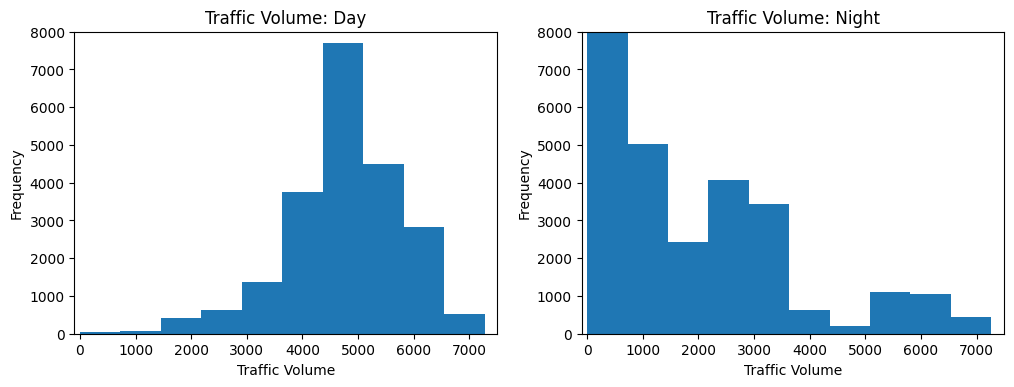

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()


In [46]:
daytime['month'] = daytime['date_time'].dt.month
daytime.describe()
day_month = daytime.groupby('month').mean()
day_month['traffic_volume']

month
1     4499.832053
2     4705.570170
3     4896.060371
4     4887.885428
5     4901.648341
6     4905.114035
7     4595.017576
8     4918.958227
9     4870.988249
10    4934.438125
11    4698.226291
12    4422.761261
Name: traffic_volume, dtype: float64

traffic by month during daytime

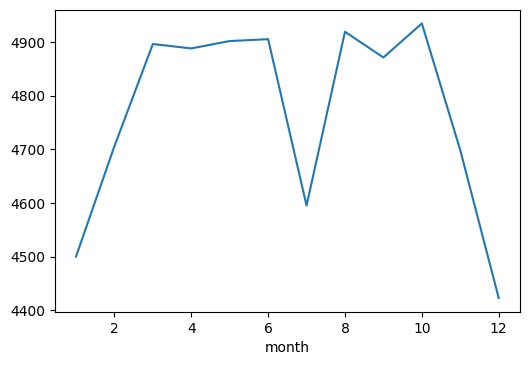

In [48]:
day_month['traffic_volume'].plot.line()

traffic by day of week

In [50]:
daytime['day_week'] = daytime['date_time'].dt.dayofweek
day_group_day = daytime.groupby('day_week').mean()
day_group_day['traffic_volume']

day_week
0    4807.164138
1    5109.419471
2    5207.297083
3    5228.966580
4    5220.602140
5    4119.368251
6    3652.753150
Name: traffic_volume, dtype: float64

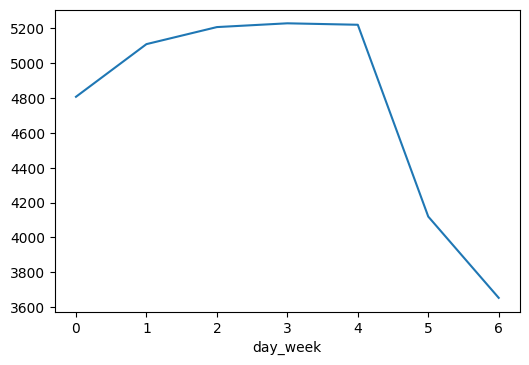

In [52]:
day_group_day['traffic_volume'].plot.line()
plt.show()

In [55]:
daytime.corr()['traffic_volume']

temp              0.145568
rain_1h           0.004704
snow_1h           0.002119
clouds_all       -0.038819
traffic_volume    1.000000
month            -0.018321
day_week         -0.376709
Name: traffic_volume, dtype: float64

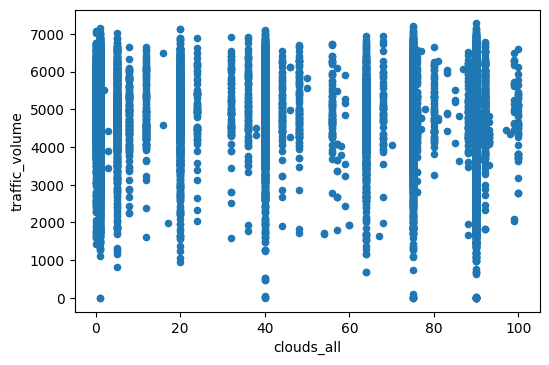

In [58]:
daytime.plot.scatter('clouds_all','traffic_volume')

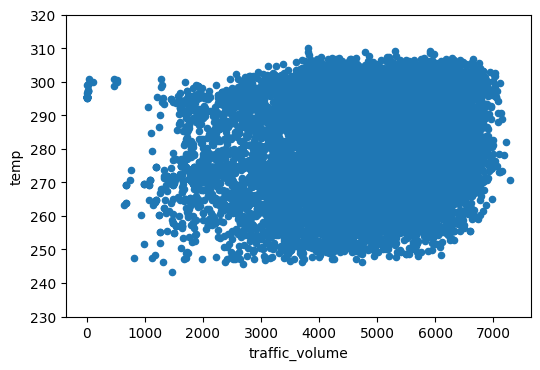

In [62]:
daytime.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320) 
plt.show()

In [65]:
weather_main_group = daytime.groupby('weather_main').mean()
weather_description_group = daytime.groupby('weather_description').mean()

             temp    rain_1h    snow_1h  clouds_all  traffic_volume  \
count   11.000000  11.000000  11.000000   11.000000       11.000000   
mean   283.838883   0.725278   0.000460   66.044309     4614.871177   
std      8.715440   1.248724   0.000764   23.069242      239.282371   
min    268.053343   0.000000   0.000000    1.665401     4211.000000   
25%    277.764554   0.028089   0.000000   63.508092     4492.313433   
50%    284.438498   0.208376   0.000000   74.763682     4642.902985   
75%    290.178368   0.989091   0.000639   77.244318     4799.258698   
max    296.730000   4.262726   0.001898   84.913642     4871.655732   

           month   day_week  
count  11.000000  11.000000  
mean    6.694157   2.747544  
std     0.382513   0.348557  
min     5.871537   2.000000  
25%     6.475954   2.739910  
50%     6.753217   2.884191  
75%     7.000000   2.935716  
max     7.142678   3.140065  


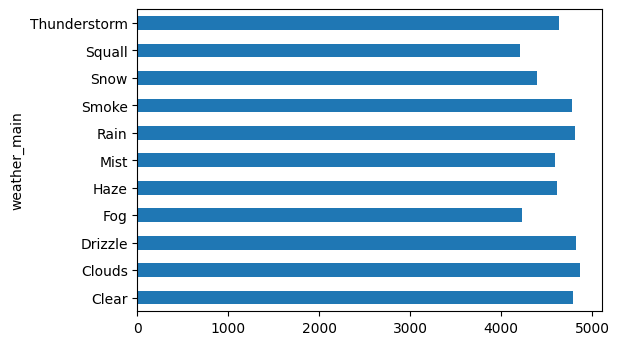

In [66]:
weather_main_group['traffic_volume'].plot.barh()